In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cv19gm.models.seir_meta import SEIRMETA
import cv19gm.utils.cv19mobility as cv19mob

# Meta-population SEIR model with 3 regions

## Build flux function

In [2]:
population = np.array([100000,200000,150000])
Phi = cv19mob.rnd_flux(population=population,fraction=0.1)

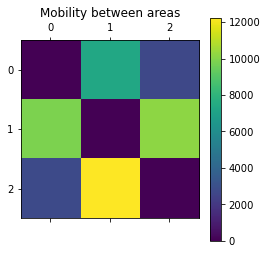

In [3]:
plt.matshow(Phi(0))
plt.title('Mobility between areas')
plt.colorbar()
plt.show()

In [4]:
beta = np.array([0.2,0.15,0.11])
mu = np.array([1,0.8,1.2])


I = np.array([1000,0,1500])
I_d = np.array([100,0,150])
R = np.array([5000,10000,7500])
I_ac = np.array([4500,9000,6500])

rR_S = 0

#E = False
#E_d = False
popfraction = 1  # np.array([1,1,1])

In [5]:
cfg = '/home/samuel/covid19geomodeller/config_files/SEIRMETA.toml'

In [6]:
seir = SEIRMETA(config=cfg,beta=beta,mu=mu,population=population,I=I,I_d=I_d,R=R,I_ac=I_ac,Phi=Phi,rR_S=rR_S,t_end=500)

In [7]:
seir.solve()

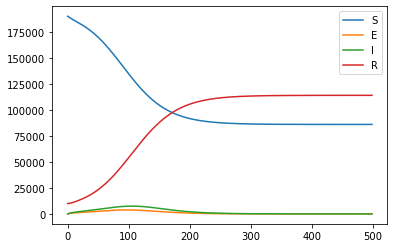

In [8]:
i = 1
plt.plot(seir.t,seir.S[i],label='S')
plt.plot(seir.t,seir.E[i],label='E')
plt.plot(seir.t,seir.I[i],label='I')
plt.plot(seir.t,seir.R[i],label='R')
plt.legend(loc=0)
plt.show()


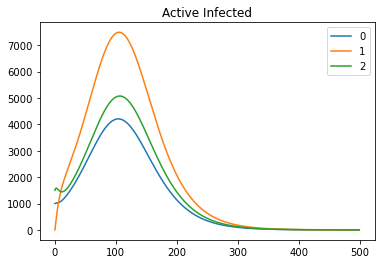

In [9]:
plt.plot(seir.t,seir.I[0],label='0')
plt.plot(seir.t,seir.I[1],label='1')
plt.plot(seir.t,seir.I[2],label='2')
plt.legend(loc=0)
plt.title('Active Infected')
plt.show()

## Output

In [10]:
seir.results

,t,S,E,E_d,I,I_d,R,R_d,node
0,0,93000,999,100,1000,100,5000,0,0
1,1,92971,921,107,1009,104,5096,40,0
2,2,92929,867,116,1014,102,5187,51,0
3,3,92868,829,125,1017,101,5274,52,0
4,4,92799,804,132,1020,101,5357,51,0
...,...,...,...,...,...,...,...,...,...
1495,495,64487,0,0,0,0,85465,306,2
1496,496,64487,0,0,0,0,85465,306,2
1497,497,64487,0,0,0,0,85465,307,2
1498,498,64488,0,0,0,0,85466,307,2


In [11]:
seir.params

,t,beta,tE_I,tI_R,rR_S,node
0,0,0.20,5.0,10.0,0,0
1,1,0.20,5.0,10.0,0,0
2,2,0.20,5.0,10.0,0,0
3,3,0.20,5.0,10.0,0,0
4,4,0.20,5.0,10.0,0,0
...,...,...,...,...,...,...
1495,495,0.11,5.0,10.0,0,2
1496,496,0.11,5.0,10.0,0,2
1497,497,0.11,5.0,10.0,0,2
1498,498,0.11,5.0,10.0,0,2


# With configuration file

In [12]:
cfg = 'cfg/SEIRMETA.toml'

In [16]:
seir2 = SEIRMETA(config=cfg,beta=beta,Phi=Phi)

In [17]:
seir2.beta

<function utils.cv19functions.build.<locals>.out(t)>

In [18]:
seir2.solve()

In [14]:
seir = SEIRMETA(config=cfg,I=I,I_d=I_d,R=R,I_ac=I_ac,Phi=Phi,rR_S=rR_S,t_end=500)

TypeError: can't multiply sequence by non-int of type 'list'